# Business Understanding
Stack Overflow developer survey organized every year in the last 11 years. And this survey has been done in different countries and on both genders. These questions, which I am going to answer based on 2020, the key questions I would like to answer are:
- Is There a Difference in The Number of Men and Women Developers?
- What are The Top 10 Countries That did The Survey of Stack Overflow in 2020?
- What are The Most Pogramming Languages Worked in United States?

# Data Understanding

First, Let's import some useful libriaries and load the data that I will use in the analysis

In [1]:
#import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load the data:
df = pd.read_csv('survey_results_public.csv')
df_info = pd.read_csv('survey_results_schema.csv')

In [3]:
#take a look at the survey data:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
#see the schema of the data:
df_info

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


In [5]:
#get some insights and see the data types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
Respondent                      64461 non-null int64
MainBranch                      64162 non-null object
Hobbyist                        64416 non-null object
Age                             45446 non-null float64
Age1stCode                      57900 non-null object
CompFreq                        40069 non-null object
CompTotal                       34826 non-null float64
ConvertedComp                   34756 non-null float64
Country                         64072 non-null object
CurrencyDesc                    45472 non-null object
CurrencySymbol                  45472 non-null object
DatabaseDesireNextYear          44070 non-null object
DatabaseWorkedWith              49537 non-null object
DevType                         49370 non-null object
EdLevel                         57431 non-null object
Employment                      63854 non-null object
Ethnicity                

In [6]:
#get some insights:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [7]:
#find the number of rows and columns in the dataset:
print("Number of Rows:" , df.shape[0]) 
print("Number of Columns:" , df.shape[1])

Number of Rows: 64461
Number of Columns: 61


# Data Preparation:

In [8]:
#see how many missing values in the dataset:
df.isna().sum()

Respondent                          0
MainBranch                        299
Hobbyist                           45
Age                             19015
Age1stCode                       6561
CompFreq                        24392
CompTotal                       29635
ConvertedComp                   29705
Country                           389
CurrencyDesc                    18989
CurrencySymbol                  18989
DatabaseDesireNextYear          20391
DatabaseWorkedWith              14924
DevType                         15091
EdLevel                          7030
Employment                        607
Ethnicity                       18513
Gender                          13904
JobFactors                      15112
JobSat                          19267
JobSeek                         12734
LanguageDesireNextYear          10348
LanguageWorkedWith               7083
MiscTechDesireNextYear          22082
MiscTechWorkedWith              24147
NEWCollabToolsDesireNextYear    17174
NEWCollabToo

In [9]:
#drop null values:
new_df = df.dropna()

In [10]:
#check the null values:
new_df.isna().sum()

Respondent                      0
MainBranch                      0
Hobbyist                        0
Age                             0
Age1stCode                      0
CompFreq                        0
CompTotal                       0
ConvertedComp                   0
Country                         0
CurrencyDesc                    0
CurrencySymbol                  0
DatabaseDesireNextYear          0
DatabaseWorkedWith              0
DevType                         0
EdLevel                         0
Employment                      0
Ethnicity                       0
Gender                          0
JobFactors                      0
JobSat                          0
JobSeek                         0
LanguageDesireNextYear          0
LanguageWorkedWith              0
MiscTechDesireNextYear          0
MiscTechWorkedWith              0
NEWCollabToolsDesireNextYear    0
NEWCollabToolsWorkedWith        0
NEWDevOps                       0
NEWDevOpsImpt                   0
NEWEdImpt     

In [12]:
#see how many diplicated rows:
new_df.duplicated().sum()

0

# Question1 :
## Is There a Difference in The Number of Men and Women Developers?

In [22]:
gender_new = new_df.loc[df['Gender'].isin(['Man', 'Woman'])]

#provide the percentage of men and women
gender_dis = gender_new.Gender.value_counts()
print(gender_dis/gender_new.shape[0]*100)

Man      96.055463
Woman     3.944537
Name: Gender, dtype: float64


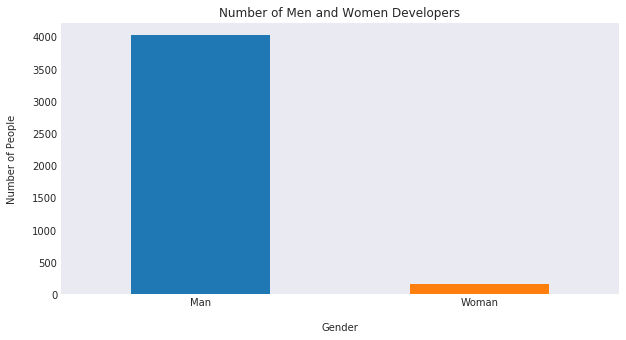

In [23]:
sns.set_style("dark")
gender_new['Gender'].value_counts().plot(kind='bar', figsize=(10, 5), rot=0)
plt.xlabel("Gender", labelpad=15)
plt.ylabel("Number of People", labelpad=15)
plt.title("Number of Men and Women Developers", y=1);

As we can see women developers represent only about 4% while men represent about 96%.

# Question2:
## What are The Top 10 Countries That did The Survey of Stack Overflow in 2020?

In [24]:
#get the unique value of all countries:
country_val = new_df['Country'].value_counts()

In [25]:
country_val

United States                                1089
United Kingdom                                324
Germany                                       266
India                                         229
Brazil                                        176
Canada                                        165
France                                        128
Australia                                     119
Netherlands                                   115
Italy                                          84
Spain                                          76
Sweden                                         74
Poland                                         59
Iran                                           51
Switzerland                                    51
Russian Federation                             49
Mexico                                         47
Turkey                                         46
Norway                                         43
Pakistan                                       38


Text(0.5,0,'Countries')

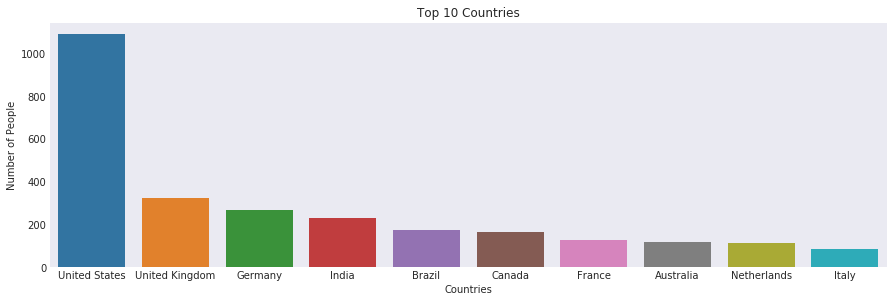

In [26]:
#show the bar chart for top 10 countries:
fig_dims = (15,4.5)
sns.set_style("dark")
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=country_val[:10].index, y=country_val[:10].values).set(title='Top 10 Countries')
ax.set_ylabel('Number of People')
ax.set_xlabel('Countries')

As we can see the United States has the highest country that did the survey of stack overflow and the second country is United Kingdom and the third country is Germany, because of that the next insight will be based on the top country that did the survey which is United State.

# Question3: 
## What are The Most Pogramming Languages Worked in United States?

In [27]:
#filter the dataframe for United States and split all the pogramming languages
usa_lists = new_df[new_df["Country"] == "United States"]["LanguageWorkedWith"].str.split(';', expand=True)
usa_lists.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
41,Bash/Shell/PowerShell,C#,HTML/CSS,Java,JavaScript,Python,None,None,None,None,None,None,None,None,None,None
79,Bash/Shell/PowerShell,C#,HTML/CSS,JavaScript,PHP,Ruby,SQL,TypeScript,None,None,None,None,None,None,None,None
117,Bash/Shell/PowerShell,C#,Go,HTML/CSS,Java,JavaScript,Kotlin,Objective-C,Python,SQL,TypeScript,None,None,None,None,None
121,Bash/Shell/PowerShell,C++,Go,Java,Python,None,None,None,None,None,None,None,None,None,None,None
126,C#,HTML/CSS,JavaScript,SQL,None,None,None,None,None,None,None,None,None,None,None,None


In [28]:
#get all the unique counts for most language used in United States
top_langugae_usa = usa_lists.stack().value_counts()

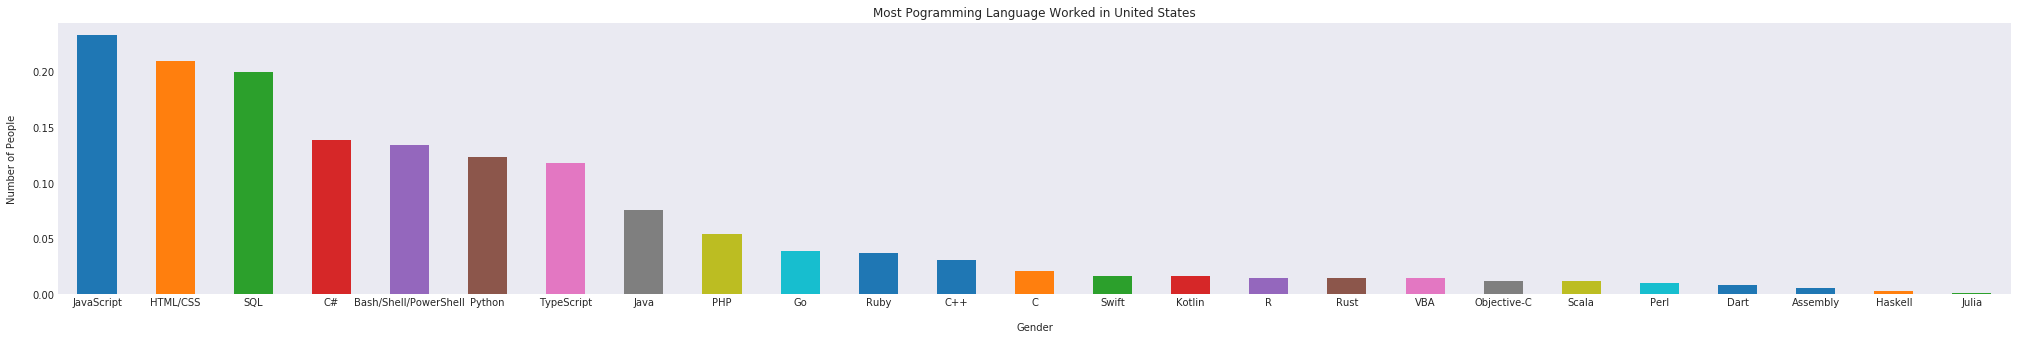

In [29]:
#show the bar chart for most language used in United States
sns.set_style("dark")
(top_langugae_usa/new_df.shape[0]).plot(kind="bar", figsize=(35, 5), rot=0)
plt.xlabel("Gender", labelpad=15)
plt.ylabel("Number of People", labelpad=15)
plt.title("Most Pogramming Language Worked in United States", y=1);

As we can see the JavaScript is the most programming language worked in the United States then comes HTML/CSS and the third is SQL where Julia is the most downrated language in the United States in 2020.

# Conclusion:

We seen there are a lot of difference between men and women developers and we seen the top 10 countries that did the survey of Stack Overflow and we did the last insight based on it which was the top pogramming languages worked in united states.